In [1]:
import numpy as np
import sys
sys.path.append('/eagle/fthmc/run')
from Scaling_FT_HMC.utils.func import auto_from_chi
from lametlat.utils.plot_settings import *

### L32 b3

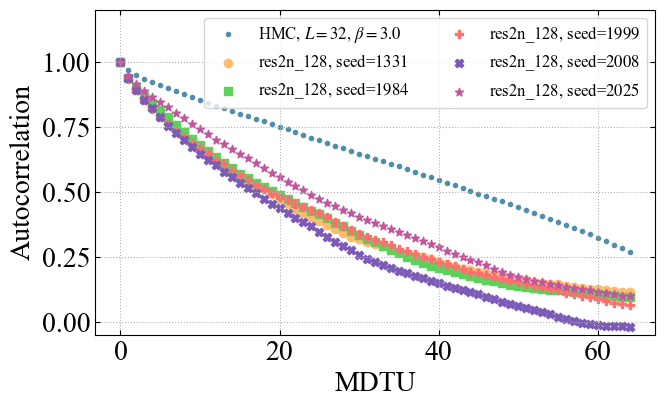

In [2]:
hmc_L32_b3_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta3.0.csv')

fthmc_res2n_L32_b3_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/res2n_epoch128_evaluation/dumps/topo_fthmc_L32_beta3.0_res2n_train_b3.0_L32_epoch128_1331.csv')
fthmc_res2n_L32_b3_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/res2n_epoch128_evaluation/dumps/topo_fthmc_L32_beta3.0_res2n_train_b3.0_L32_epoch128_1984.csv')
fthmc_res2n_L32_b3_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/res2n_epoch128_evaluation/dumps/topo_fthmc_L32_beta3.0_res2n_train_b3.0_L32_epoch128_1999.csv')
fthmc_res2n_L32_b3_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/res2n_epoch128_evaluation/dumps/topo_fthmc_L32_beta3.0_res2n_train_b3.0_L32_epoch128_2008.csv')
fthmc_res2n_L32_b3_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/res2n_epoch128_evaluation/dumps/topo_fthmc_L32_beta3.0_res2n_train_b3.0_L32_epoch128_2025.csv')

beta = 3.0
max_lag = 64
volume = 32**2

hmc_L32_b3_auto = auto_from_chi(hmc_L32_b3_topo, max_lag=max_lag, beta=beta, volume=volume)

fthmc_res2n_L32_b3_auto_1331 = auto_from_chi(fthmc_res2n_L32_b3_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_res2n_L32_b3_auto_1984 = auto_from_chi(fthmc_res2n_L32_b3_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_res2n_L32_b3_auto_1999 = auto_from_chi(fthmc_res2n_L32_b3_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_res2n_L32_b3_auto_2008 = auto_from_chi(fthmc_res2n_L32_b3_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_res2n_L32_b3_auto_2025 = auto_from_chi(fthmc_res2n_L32_b3_topo_2025, max_lag=max_lag, beta=beta, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b3_auto)), hmc_L32_b3_auto, label='HMC, $L=32$, $\\beta=3.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_res2n_L32_b3_auto_1331)), fthmc_res2n_L32_b3_auto_1331, label='res2n_128, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_res2n_L32_b3_auto_1984)), fthmc_res2n_L32_b3_auto_1984, label='res2n_128, seed=$1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_res2n_L32_b3_auto_1999)), fthmc_res2n_L32_b3_auto_1999, label='res2n_128, seed=$1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_res2n_L32_b3_auto_2008)), fthmc_res2n_L32_b3_auto_2008, label='res2n_128, seed=$2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_res2n_L32_b3_auto_2025)), fthmc_res2n_L32_b3_auto_2025, label='res2n_128, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(-0.05, 1.2)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/res2n_train_b3_L32_epoch128_autocorrelation_L32_b3.pdf', transparent=True)
plt.show()


In [3]:

gamma_hmc = 1 / (1 - hmc_L32_b3_auto[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_res2n_L32_b3_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_res2n_L32_b3_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_res2n_L32_b3_auto_1999[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_res2n_L32_b3_auto_2008[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_res2n_L32_b3_auto_2025[16])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b3_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])
gamma_ratio_L32_b3_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L32 b3: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2025}")
print(f"mean(16) for L32 b3: {gamma_ratio_L32_b3_mean}")
print(f"std(16) for L32 b3: {gamma_ratio_L32_b3_std}")

deltaQ_hmc = [ abs(hmc_L32_b3_topo[i] - hmc_L32_b3_topo[i-1]) for i in range(1, len(hmc_L32_b3_topo))]
deltaQ_fthmc_1331 = [ abs(fthmc_res2n_L32_b3_topo_1331[i] - fthmc_res2n_L32_b3_topo_1331[i-1]) for i in range(1, len(fthmc_res2n_L32_b3_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_res2n_L32_b3_topo_1984[i] - fthmc_res2n_L32_b3_topo_1984[i-1]) for i in range(1, len(fthmc_res2n_L32_b3_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_res2n_L32_b3_topo_1999[i] - fthmc_res2n_L32_b3_topo_1999[i-1]) for i in range(1, len(fthmc_res2n_L32_b3_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_res2n_L32_b3_topo_2008[i] - fthmc_res2n_L32_b3_topo_2008[i-1]) for i in range(1, len(fthmc_res2n_L32_b3_topo_2008))]
deltaQ_fthmc_2025 = [ abs(fthmc_res2n_L32_b3_topo_2025[i] - fthmc_res2n_L32_b3_topo_2025[i-1]) for i in range(1, len(fthmc_res2n_L32_b3_topo_2025))]

deltaQ_hmc_L32_b3_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b3_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b3_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])


print("\n>>> deltaQ")
print(f"deltaQ for HMC L32 b3: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b3: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L32 b3: {deltaQ_fthmc_L32_b3_mean / deltaQ_hmc_L32_b3_mean}")
print(f"std(deltaQ) ratio for FTHMC L32 b3: {deltaQ_fthmc_L32_b3_std / deltaQ_hmc_L32_b3_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b3: 2.192561983471075, 2.135227272727273, 2.1665805785123973, 2.3186983471074383, 1.7743801652892564
mean(16) for L32 b3: 2.1174896694214884
std(16) for L32 b3: 0.18252093362963034

>>> deltaQ
deltaQ for HMC L32 b3: 0.49474969474969477
deltaQ for FTHMC L32 b3: 0.7601953601953602, 0.7443223443223443, 0.7853479853479853, 0.7833943833943834, 0.7829059829059829
mean(deltaQ) ratio for FTHMC L32 b3: 1.5588351431391905
std(deltaQ) ratio for FTHMC L32 b3: 0.03295777364680154


### L32 b6

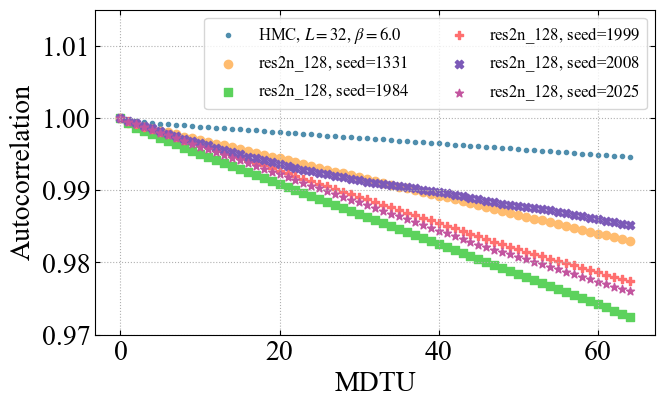

In [4]:
hmc_L32_b6_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta6.0.csv')

fthmc_res2n_L32_b6_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/res2n_epoch128_evaluation/dumps/topo_fthmc_L32_beta6.0_res2n_train_b3.0_L32_epoch128_1331.csv')
fthmc_res2n_L32_b6_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/res2n_epoch128_evaluation/dumps/topo_fthmc_L32_beta6.0_res2n_train_b3.0_L32_epoch128_1984.csv')
fthmc_res2n_L32_b6_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/res2n_epoch128_evaluation/dumps/topo_fthmc_L32_beta6.0_res2n_train_b3.0_L32_epoch128_1999.csv')
fthmc_res2n_L32_b6_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/res2n_epoch128_evaluation/dumps/topo_fthmc_L32_beta6.0_res2n_train_b3.0_L32_epoch128_2008.csv')
fthmc_res2n_L32_b6_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/res2n_epoch128_evaluation/dumps/topo_fthmc_L32_beta6.0_res2n_train_b3.0_L32_epoch128_2025.csv')

beta = 6.0
max_lag = 64
volume = 32**2

hmc_L32_b6_auto = auto_from_chi(hmc_L32_b6_topo, max_lag=max_lag, beta=beta, volume=volume)

fthmc_res2n_L32_b6_auto_1331 = auto_from_chi(fthmc_res2n_L32_b6_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_res2n_L32_b6_auto_1984 = auto_from_chi(fthmc_res2n_L32_b6_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_res2n_L32_b6_auto_1999 = auto_from_chi(fthmc_res2n_L32_b6_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_res2n_L32_b6_auto_2008 = auto_from_chi(fthmc_res2n_L32_b6_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_res2n_L32_b6_auto_2025 = auto_from_chi(fthmc_res2n_L32_b6_topo_2025, max_lag=max_lag, beta=beta, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b6_auto)), hmc_L32_b6_auto, label='HMC, $L=32$, $\\beta=6.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_res2n_L32_b6_auto_1331)), fthmc_res2n_L32_b6_auto_1331, label='res2n_128, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_res2n_L32_b6_auto_1984)), fthmc_res2n_L32_b6_auto_1984, label='res2n_128, seed=$1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_res2n_L32_b6_auto_1999)), fthmc_res2n_L32_b6_auto_1999, label='res2n_128, seed=$1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_res2n_L32_b6_auto_2008)), fthmc_res2n_L32_b6_auto_2008, label='res2n_128, seed=$2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_res2n_L32_b6_auto_2025)), fthmc_res2n_L32_b6_auto_2025, label='res2n_128, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(0.97, 1.015)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/res2n_train_b3_L32_epoch128_autocorrelation_L32_b6.pdf', transparent=True)
plt.show()


In [5]:
gamma_hmc = 1 / (1 - hmc_L32_b6_auto[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_res2n_L32_b6_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_res2n_L32_b6_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_res2n_L32_b6_auto_1999[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_res2n_L32_b6_auto_2008[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_res2n_L32_b6_auto_2025[16])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b6_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])
gamma_ratio_L32_b6_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L32 b6: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2025}")
print(f"mean(16) for L32 b6: {gamma_ratio_L32_b6_mean}")
print(f"std(16) for L32 b6: {gamma_ratio_L32_b6_std}")

deltaQ_hmc = [ abs(hmc_L32_b6_topo[i] - hmc_L32_b6_topo[i-1]) for i in range(1, len(hmc_L32_b6_topo))]
deltaQ_fthmc_1331 = [ abs(fthmc_res2n_L32_b6_topo_1331[i] - fthmc_res2n_L32_b6_topo_1331[i-1]) for i in range(1, len(fthmc_res2n_L32_b6_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_res2n_L32_b6_topo_1984[i] - fthmc_res2n_L32_b6_topo_1984[i-1]) for i in range(1, len(fthmc_res2n_L32_b6_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_res2n_L32_b6_topo_1999[i] - fthmc_res2n_L32_b6_topo_1999[i-1]) for i in range(1, len(fthmc_res2n_L32_b6_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_res2n_L32_b6_topo_2008[i] - fthmc_res2n_L32_b6_topo_2008[i-1]) for i in range(1, len(fthmc_res2n_L32_b6_topo_2008))]
deltaQ_fthmc_2025 = [ abs(fthmc_res2n_L32_b6_topo_2025[i] - fthmc_res2n_L32_b6_topo_2025[i-1]) for i in range(1, len(fthmc_res2n_L32_b6_topo_2025))]

deltaQ_hmc_L32_b6_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b6_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b6_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])


print("\n>>> deltaQ")
print(f"deltaQ for HMC L32 b6: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b6: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L32 b6: {deltaQ_fthmc_L32_b6_mean / deltaQ_hmc_L32_b6_mean}")
print(f"std(deltaQ) ratio for FTHMC L32 b6: {deltaQ_fthmc_L32_b6_std / deltaQ_hmc_L32_b6_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b6: 2.781249999999987, 4.562499999999975, 3.5624999999999747, 3.2500000000000338, 3.8125000000000084
mean(16) for L32 b6: 3.5937499999999956
std(16) for L32 b6: 0.594243216200228

>>> deltaQ
deltaQ for HMC L32 b6: 0.002686202686202686
deltaQ for FTHMC L32 b6: 0.005860805860805861, 0.006837606837606838, 0.004395604395604396, 0.003418803418803419, 0.00463980463980464
mean(deltaQ) ratio for FTHMC L32 b6: 1.872727272727273
std(deltaQ) ratio for FTHMC L32 b6: 0.44387474966304374


### L64 b6

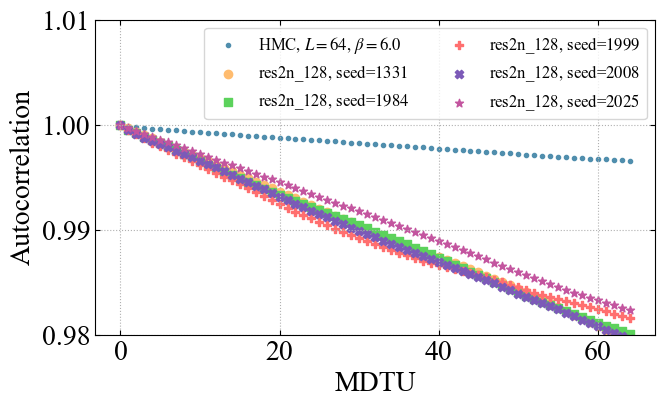

In [6]:
hmc_L64_b6_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L64_beta6.0.csv')

fthmc_res2n_L64_b6_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/res2n_epoch128_evaluation/dumps/topo_fthmc_L64_beta6.0_res2n_train_b3.0_L32_epoch128_1331.csv')
fthmc_res2n_L64_b6_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/res2n_epoch128_evaluation/dumps/topo_fthmc_L64_beta6.0_res2n_train_b3.0_L32_epoch128_1984.csv')
fthmc_res2n_L64_b6_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/res2n_epoch128_evaluation/dumps/topo_fthmc_L64_beta6.0_res2n_train_b3.0_L32_epoch128_1999.csv')
fthmc_res2n_L64_b6_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/res2n_epoch128_evaluation/dumps/topo_fthmc_L64_beta6.0_res2n_train_b3.0_L32_epoch128_2008.csv')
fthmc_res2n_L64_b6_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/res2n_epoch128_evaluation/dumps/topo_fthmc_L64_beta6.0_res2n_train_b3.0_L32_epoch128_2025.csv')

beta = 6.0
max_lag = 64
volume = 64**2

hmc_L64_b6_auto = auto_from_chi(hmc_L64_b6_topo, max_lag=max_lag, beta=beta, volume=volume)

fthmc_res2n_L64_b6_auto_1331 = auto_from_chi(fthmc_res2n_L64_b6_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_res2n_L64_b6_auto_1984 = auto_from_chi(fthmc_res2n_L64_b6_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_res2n_L64_b6_auto_1999 = auto_from_chi(fthmc_res2n_L64_b6_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_res2n_L64_b6_auto_2008 = auto_from_chi(fthmc_res2n_L64_b6_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_res2n_L64_b6_auto_2025 = auto_from_chi(fthmc_res2n_L64_b6_topo_2025, max_lag=max_lag, beta=beta, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L64_b6_auto)), hmc_L64_b6_auto, label='HMC, $L=64$, $\\beta=6.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_res2n_L64_b6_auto_1331)), fthmc_res2n_L64_b6_auto_1331, label='res2n_128, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_res2n_L64_b6_auto_1984)), fthmc_res2n_L64_b6_auto_1984, label='res2n_128, seed=$1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_res2n_L64_b6_auto_1999)), fthmc_res2n_L64_b6_auto_1999, label='res2n_128, seed=$1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_res2n_L64_b6_auto_2008)), fthmc_res2n_L64_b6_auto_2008, label='res2n_128, seed=$2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_res2n_L64_b6_auto_2025)), fthmc_res2n_L64_b6_auto_2025, label='res2n_128, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(0.98, 1.01)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/res2n_train_b3_L32_epoch128_autocorrelation_L64_b6.pdf', transparent=True)
plt.show()


In [7]:
gamma_hmc = 1 / (1 - hmc_L64_b6_auto[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_res2n_L64_b6_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_res2n_L64_b6_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_res2n_L64_b6_auto_1999[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_res2n_L64_b6_auto_2008[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_res2n_L64_b6_auto_2025[16])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L64_b6_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])
gamma_ratio_L64_b6_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L64 b6: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2025}")
print(f"mean(16) for L64 b6: {gamma_ratio_L64_b6_mean}")
print(f"std(16) for L64 b6: {gamma_ratio_L64_b6_std}")

deltaQ_hmc = [ abs(hmc_L64_b6_topo[i] - hmc_L64_b6_topo[i-1]) for i in range(1, len(hmc_L64_b6_topo))]
deltaQ_fthmc_1331 = [ abs(fthmc_res2n_L64_b6_topo_1331[i] - fthmc_res2n_L64_b6_topo_1331[i-1]) for i in range(1, len(fthmc_res2n_L64_b6_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_res2n_L64_b6_topo_1984[i] - fthmc_res2n_L64_b6_topo_1984[i-1]) for i in range(1, len(fthmc_res2n_L64_b6_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_res2n_L64_b6_topo_1999[i] - fthmc_res2n_L64_b6_topo_1999[i-1]) for i in range(1, len(fthmc_res2n_L64_b6_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_res2n_L64_b6_topo_2008[i] - fthmc_res2n_L64_b6_topo_2008[i-1]) for i in range(1, len(fthmc_res2n_L64_b6_topo_2008))]
deltaQ_fthmc_2025 = [ abs(fthmc_res2n_L64_b6_topo_2025[i] - fthmc_res2n_L64_b6_topo_2025[i-1]) for i in range(1, len(fthmc_res2n_L64_b6_topo_2025))]

deltaQ_hmc_L64_b6_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L64_b6_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L64_b6_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])


print("\n>>> deltaQ")
print(f"deltaQ for HMC L64 b6: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L64 b6: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L64 b6: {deltaQ_fthmc_L64_b6_mean / deltaQ_hmc_L64_b6_mean}")
print(f"std(deltaQ) ratio for FTHMC L64 b6: {deltaQ_fthmc_L64_b6_std / deltaQ_hmc_L64_b6_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L64 b6: 4.974999999999875, 5.312499999999877, 5.906249999999831, 5.3249999999998865, 4.312499999999878
mean(16) for L64 b6: 5.166249999999869
std(16) for L64 b6: 0.5214702771970678

>>> deltaQ
deltaQ for HMC L64 b6: 0.005860805860805861
deltaQ for FTHMC L64 b6: 0.012942612942612943, 0.017582417582417582, 0.017826617826617826, 0.018315018315018316, 0.011721611721611722
mean(deltaQ) ratio for FTHMC L64 b6: 2.675
std(deltaQ) ratio for FTHMC L64 b6: 0.4724345927686122
